In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("./kandydaci_sejm.csv", delimiter=';')

# Kto uzyskał najwięcej głosów w wyborach parlamentarnych?

In [8]:
max_index = df['Liczba głosów'].idxmax()
max_row = df.loc[max_index]
print(max_row['Nazwisko i imiona'])
print(max_row['Liczba głosów'])

Donald Franciszek TUSK
538634


### Najwięcej głosów uzyskał Doland Tusk (538634 głosy)

# Jakie są najczęściej uprawiane zawody wśród kandydatów do Sejmu? A jakie wsód osób, które dostały się do Sejmu?

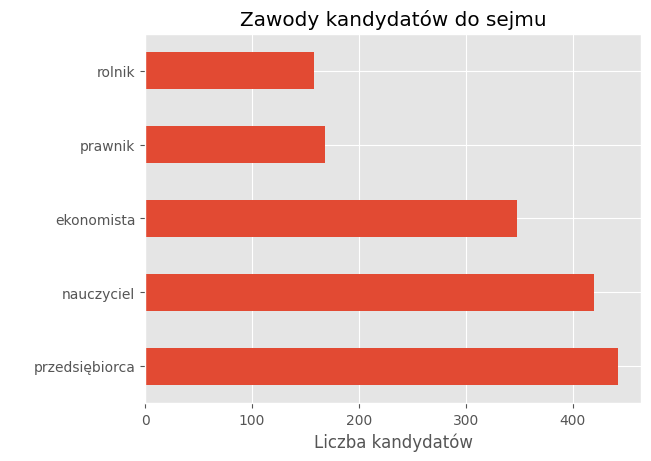

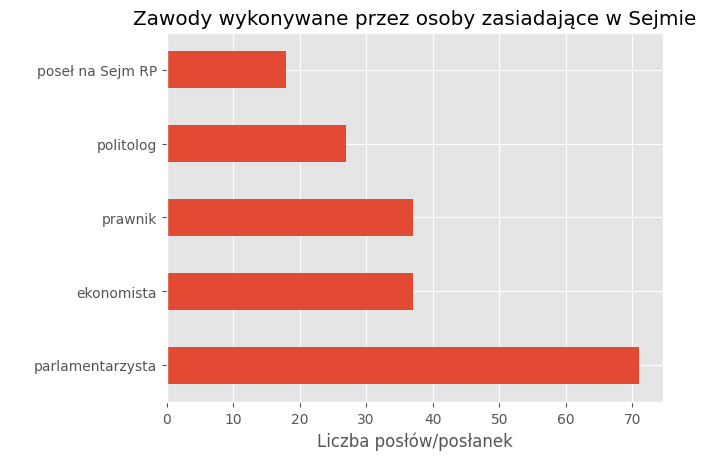

In [33]:
job = df['Zawód'].value_counts()
job_5 = job.head(5)
posłowie = df.loc[df['Czy przyznano mandat']=='Tak', 'Zawód']
zawody_posłowie = posłowie.value_counts()
zawody_posłowie_5 = zawody_posłowie.head(5)
ax = job_5.plot(kind='barh', title="Zawody kandydatów do sejmu")
ax.set_xlabel("Liczba kandydatów")
ax.set_ylabel(" ")
plt.show()

ax = zawody_posłowie_5.plot(kind='barh', title="Zawody wykonywane przez osoby zasiadające w Sejmie")
ax.set_xlabel("Liczba posłów/posłanek")
ax.set_ylabel(" ")
plt.show()

### Widać, że najwięcej osób, które dostały się do Sejmu już pracowały jak parlamentarzyści. 
### Grupy zawodowe, które licznie startują w wyborach oraz dostają się do sejmu to ekonomiści i prawnicy.

# Jaki jest udział kobiet i mężczyzn wśród kandydatów do Sejmu?

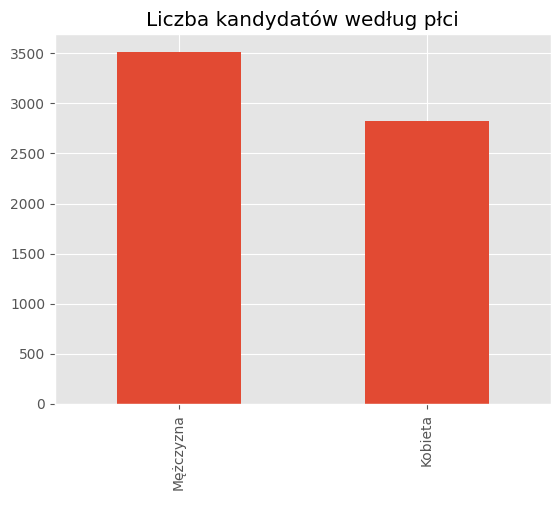

In [70]:
df['Płeć'].value_counts().plot(kind='bar', title='Liczba kandydatów według płci')
plt.xlabel(" ")
plt.show()

# Szanse na zdobycie mandatu w zależności od płci w poszczególnych komitetach 

In [65]:
df_komitety = df['Nazwa komitetu'].value_counts().head(5)
komitety = df_komitety.index.to_list()
print("Stosunek szansy na wybór do Sejmu mężczyzn względem kobiet dla poszczólnych komitetów wynosi: \n")
for komitet in komitety:
    df_komitetowy = df[df['Nazwa komitetu']==komitet]
    kobiety_z_mandatem = df_komitetowy[(df_komitetowy['Płeć']=='Kobieta') & (df_komitetowy['Czy przyznano mandat']=='Tak')]
    liczba_kobiet_z_mandatem = kobiety_z_mandatem.shape[0]
    wszystkie_kobiety = df_komitetowy[df_komitetowy['Płeć']=='Kobieta']
    liczba_kobiet = wszystkie_kobiety.shape[0]
    round((liczba_kobiet_z_mandatem / liczba_kobiet)*100, 2)
    mezczyzni_z_mandatem = df_komitetowy[(df_komitetowy['Płeć']=='Mężczyzna') & (df_komitetowy['Czy przyznano mandat']=='Tak')]
    liczba_mezczyzn_z_mandatem = mezczyzni_z_mandatem.shape[0]
    wszyscy_mezczyzni = df_komitetowy[df_komitetowy['Płeć']=='Mężczyzna']
    liczba_mezczyzn = wszyscy_mezczyzni.shape[0]
    round((liczba_mezczyzn_z_mandatem / liczba_mezczyzn)*100, 2)
    result = round((round((liczba_mezczyzn_z_mandatem / liczba_mezczyzn)*100, 2))/(round((liczba_kobiet_z_mandatem / liczba_kobiet)*100, 2)),3)
    print(f"{komitet} : {result}")

Stosunek szansy na wybór do Sejmu mężczyzn względem kobiet dla poszczólnych komitetów wynosi: 

KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI : 1.439
KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE : 1.694
KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ : 2.444
KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ : 11.481
KOMITET WYBORCZY NOWA LEWICA : 1.147


## Stosunek procentu mężczyzn (którzy zdobyli mandat do wszystkich startujących mężczyzn) do procentu kobiet (które zdobyły mandat do wszystkich startujących kobiet):
### dla KO wynosi 1,439;
### dla Trzeciej Drogi wynosi 1,694;
### dla PiSu wynosi 2,444; 
### dla Konfederacji wynosi 11,481; 
### dla Nowej Lewicy wynosi 1,147.
## Wniosek: Kobieta startująca z listy Konfederacji ma ponad 10-krotnie mniejszą szansę na zdobycie mandatu niż mężczyzna. Natomiast kobieta startująca z ramienia Nowej Lewicy ma prawie takie same szanse na wejście do Sejmu co mężczyzna (ale nadal jest około 10% procent różnicy na korzyść mężczyzn).


# Jak rozkładało się prawdopodobieństwo uzyskania mandatu w zależności od pozycji na liście wyborczej? 

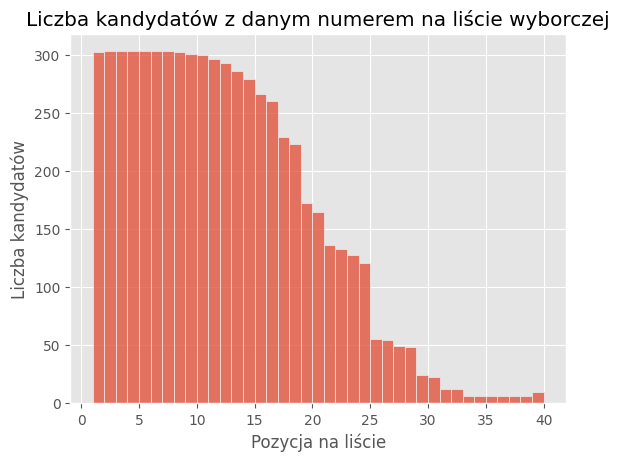

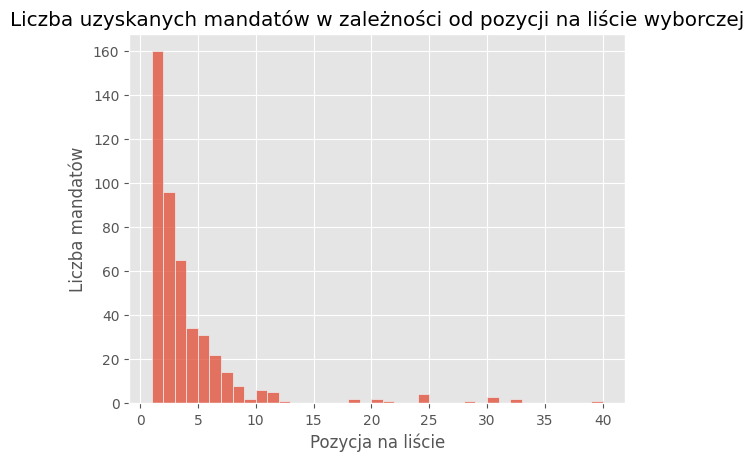

In [73]:
df['Mandat_01']=np.where(df['Czy przyznano mandat']=='Tak', 1, 0)
ax_liczba_kandydatów = sns.histplot(data=df, x='Pozycja na liście', binwidth=1)
ax_liczba_kandydatów.set_title("Liczba kandydatów z danym numerem na liście wyborczej")
ax_liczba_kandydatów.set_ylabel("Liczba kandydatów")
plt.show()
ax_liczba_mandatów = sns.histplot(data=df[df["Mandat_01"] == 1], x="Pozycja na liście", binwidth=1)
ax_liczba_mandatów.set_title("Liczba uzyskanych mandatów w zależności od pozycji na liście wyborczej")
ax_liczba_mandatów.set_ylabel("Liczba mandatów")
plt.show()

## Widać, że im wyższy numer na liście tym większa liczba mandatów, co wynika m.in. z większej liczby kandydatów z wysokimi numerami. Widać także że dalekie miejsce na liście (prawdopodobnie ostatnie w ramach listy) także daje większe szanse na uzyskanie mandatu.
### Na wykresie widać, też że jest mniej kandadatów z numerem 1 niż z kolejnym (co wydaje się nielogicze). Po dogłębnej analizie okazuje się, że ten kandydat został skreślony z listy. 

In [78]:
# df[(df['Nr okręgu']==1) & (df['Pozycja na liście']==1)]

# Jak rozkładało się prawdopodobieństwo uzyskania mandatu w zależności od miejsca na liście wyborczej w poszczególnych listach?

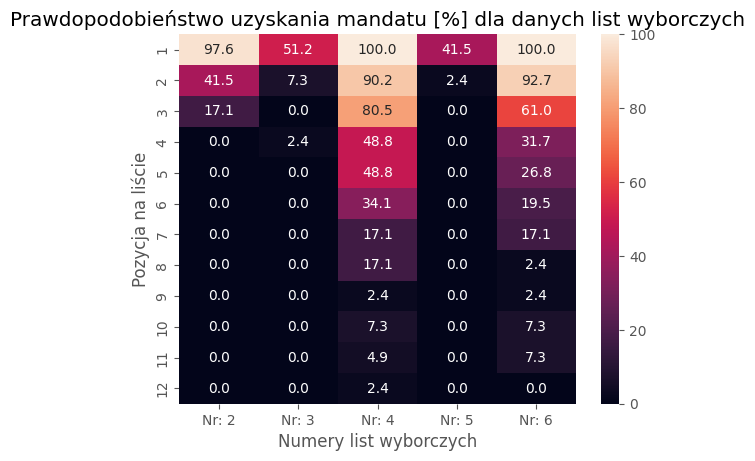

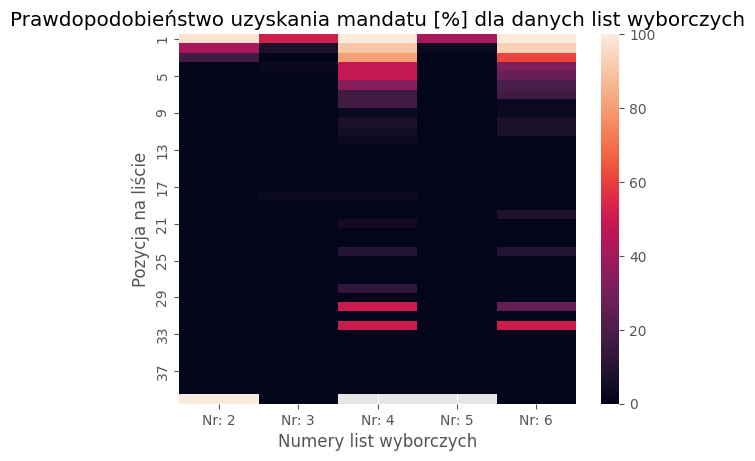

In [75]:
subset_df= df.groupby(['Pozycja na liście','Nr listy']).agg(liczba_osób=("Mandat_01", 'count'), liczba_przyznanych_mandatów=("Mandat_01", 'sum')).reset_index()
subset_df.set_index('Pozycja na liście', inplace=True)
subset_df['Prawdopodobieństwo_przyznania_mandatu_%']=round(100* subset_df['liczba_przyznanych_mandatów']/ subset_df['liczba_osób'],2)
subset_df_listy = pd.DataFrame()
numery_list = subset_df['Nr listy'].unique()
for numer in numery_list:
    subset_df_listy[f'Nr: {numer}'] = subset_df.loc[subset_df['Nr listy'] == numer, 'Prawdopodobieństwo_przyznania_mandatu_%']
subset_df_listy
subset_df_listy_heatmap = subset_df_listy.iloc[0:12, 1:6]
ax_heatmap = sns.heatmap(subset_df_listy_heatmap, annot=True, fmt='.1f')
ax_heatmap.set_title("Prawdopodobieństwo uzyskania mandatu [%] dla danych list wyborczych")
ax_heatmap.set_xlabel("Numery list wyborczych")
plt.show()
subset_df_listy_heatmap_cala = subset_df_listy.iloc[:, 1:6]
ax_heatmap_2 = sns.heatmap(subset_df_listy_heatmap_cala)
ax_heatmap_2.set_title("Prawdopodobieństwo uzyskania mandatu [%] dla danych list wyborczych")
ax_heatmap_2.set_xlabel("Numery list wyborczych")
yticks = ax_heatmap_2.get_yticks()
ax_heatmap_2.set_yticks(yticks[::2])
plt.show()

Z list wyborczych: 1, 7:11 żaden kandydat nie uzyskał mandatu, czyli prawdopodobieństwo wynosiło zero.
Komitety wyborcze:
2 - Trzecia Droga, 
3 - Nowa Lewica
4 - Prawo i Sprawiedliwość 
5 - Konfederacja 
6 - Koalicja Obywatelska.

## Wnioski: Największe szanse na dostanie się do Sejmu mają osoby z wysokim numerem na liście wyborczej. Zwiększone prawdopodobieństwo jest także na ostatnich miejscach na listach. 
## Wszyscy kandydaci z KO i PiS, którzy byli pierwsi na listach dostali się do Sejmu. 

# Na których miejscach na listach umieszczano kobiety, a na których mężczyzn? Czy jest jakaś zależność?

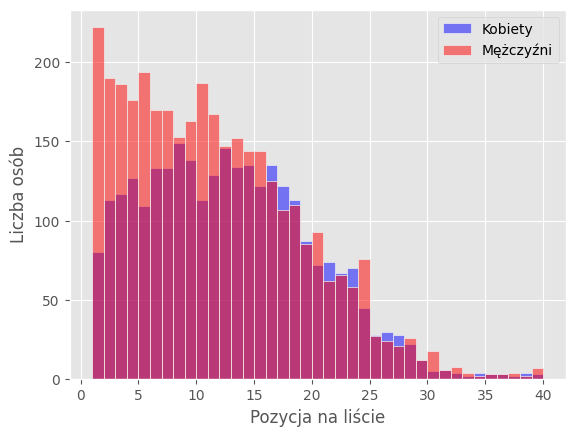

In [77]:
kobiety_numery = df.loc[df['Płeć'] == "Kobieta", 'Pozycja na liście']
mezczyzni_numery = df.loc[df['Płeć'] == "Mężczyzna", 'Pozycja na liście']
sns.histplot(kobiety_numery, binwidth=1, color='blue', alpha=0.5, label='Kobiety')
sns.histplot(mezczyzni_numery, binwidth=1, color='red', alpha=0.5, label='Mężczyźni')
plt.xlabel('Pozycja na liście')
plt.ylabel('Liczba osób')
plt.legend()
plt.show()

## Wnioski: Widać wyraźnie różny rozkład dla kobiet i mężczyzn na listach wyborczych. Może to sugerować, że w polityce istnieje bariera dla równego traktowania płci. Skoro im wyższy numer na liście tym większa szansa na uzyskanie mandatu, to może kandydatury kobiet (nie wszystkich) są tylko "symboliczne". 